In [1]:
#importing libraries under standard aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#inline visualizations
%matplotlib inline

#importing our models
#we'll be using mostly Scikit.Learn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

#visualtion methods and methods for model analysis
from sklearn.metrics import roc_curve, auc, confusion_matrix

#setting a random seed for reproduceability
import random
random.seed(42)

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")

In [122]:
#As this file is ';' separated

data = pd.read_csv("bank.csv", sep = ';')

#reviwing the dataframe to ensure everything loaded correctly
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [123]:
print(data.shape)

data.describe()

(4521, 17)


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [124]:
#checking for Null values 
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [125]:
#looking at our target column 
print(data.y.unique())

['no' 'yes']


In [126]:
for i in range(len(data.y)):
    if data.y[i] == 'no':
        data.y[i] = 0
    else:
        data.y[i]=1
        
data.y.unique()

array([0, 1], dtype=object)

In [127]:
data.y.sum()


521

An 11.52% Sucess rate on a phone marketing campaign is very reasonable. This type of marketing approach is worth repeating if we can identify these customers in advance. Then it's only a matter of making all the calls.

class is imbalanced then why not SMOTE? I know SMOTE would oversample the imbalanced data but it might increase chances of overfitting since it shall replicate minority class events.So avoided that to check classifier's performance.

Next we'll look at the .info() summary statistics to ensure that the expected column type matches so that we can handle null values that are obscured from .isna()

In [128]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [129]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = data.poutcome == 'other'
data.drop(data[condition].index, axis = 0, inplace = False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,0
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,0
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0


In [130]:
# Step 2: Replace 'unknown' in job and education with 'other'
data[['job','education']] = data[['job','education']].replace(['unknown'],'other')

In [131]:
from scipy.stats import zscore

data[['balance']].mean()

data['balance_outliers'] = data['balance']
data['balance_outliers']= zscore(data['balance_outliers'])

condition1 = (data['balance_outliers']>3) | (data['balance_outliers']<-3 )
data = data.drop(data[condition1].index, axis = 0, inplace = False)
data = data.drop('balance_outliers', axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


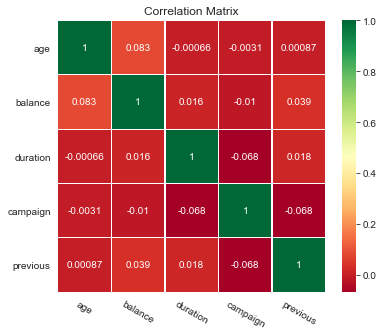

In [132]:
corr_data = data[['age','balance','duration','campaign','previous','y']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Here we could see from correlation matrix that balance and age both seem to correlate well unlike other features.

In [133]:
# Step 3: Change the unit of 'duration' from seconds to minutes
data['duration'] = data['duration'].apply(lambda n:n/60).round(2)

In [134]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (data['duration']<5/60)
data = data.drop(data[condition2].index, axis = 0, inplace = False)

Text(0.5, 1.0, 'The Relationship between the Number and Duration of Calls with target')

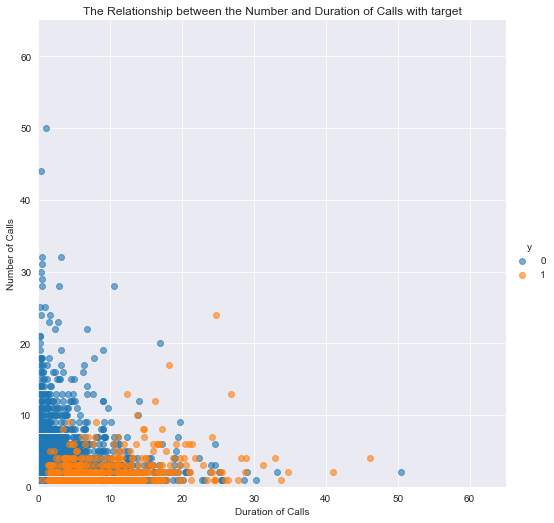

In [135]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls')
plt.title('The Relationship between the Number and Duration of Calls with target')

As everything looks clean now so we can save our target column (y) as a single variable out of the dataframe and drop the column from the main dataframe.



In [136]:
#saving y as our target 
target = data.y

#dropping y from the new dataframe of features
df = data.drop(['y'], axis=1)

#checking to ensure everything loaded properly
print(target.shape, df.shape)
df.head()

(4424,) (4424, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1.32,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,3.67,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,3.08,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,3.32,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,3.77,1,-1,0,unknown


Many of the feature columns are categorical and need to be split into dummy variables.



In [137]:
#creating a list of categorical columns for easier coding
cols = ['job', 'marital','education','default','housing','loan','contact','month','poutcome']

#using the pandas get_dummies method and adding a prefix to denote the columns we changed
df = pd.get_dummies(df, prefix='dumm_', columns=cols)
df.head()

,age,balance,day,duration,campaign,pdays,previous,dumm__admin.,dumm__blue-collar,dumm__entrepreneur,...,dumm__jun,dumm__mar,dumm__may,dumm__nov,dumm__oct,dumm__sep,dumm__failure,dumm__other,dumm__success,dumm__unknown
0,30,1787,19,1.32,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,3.67,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,3.08,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,3.32,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,3.77,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


Let's have a look at the histograms of the features we selected.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C632FABA8>,
      dtype=object)

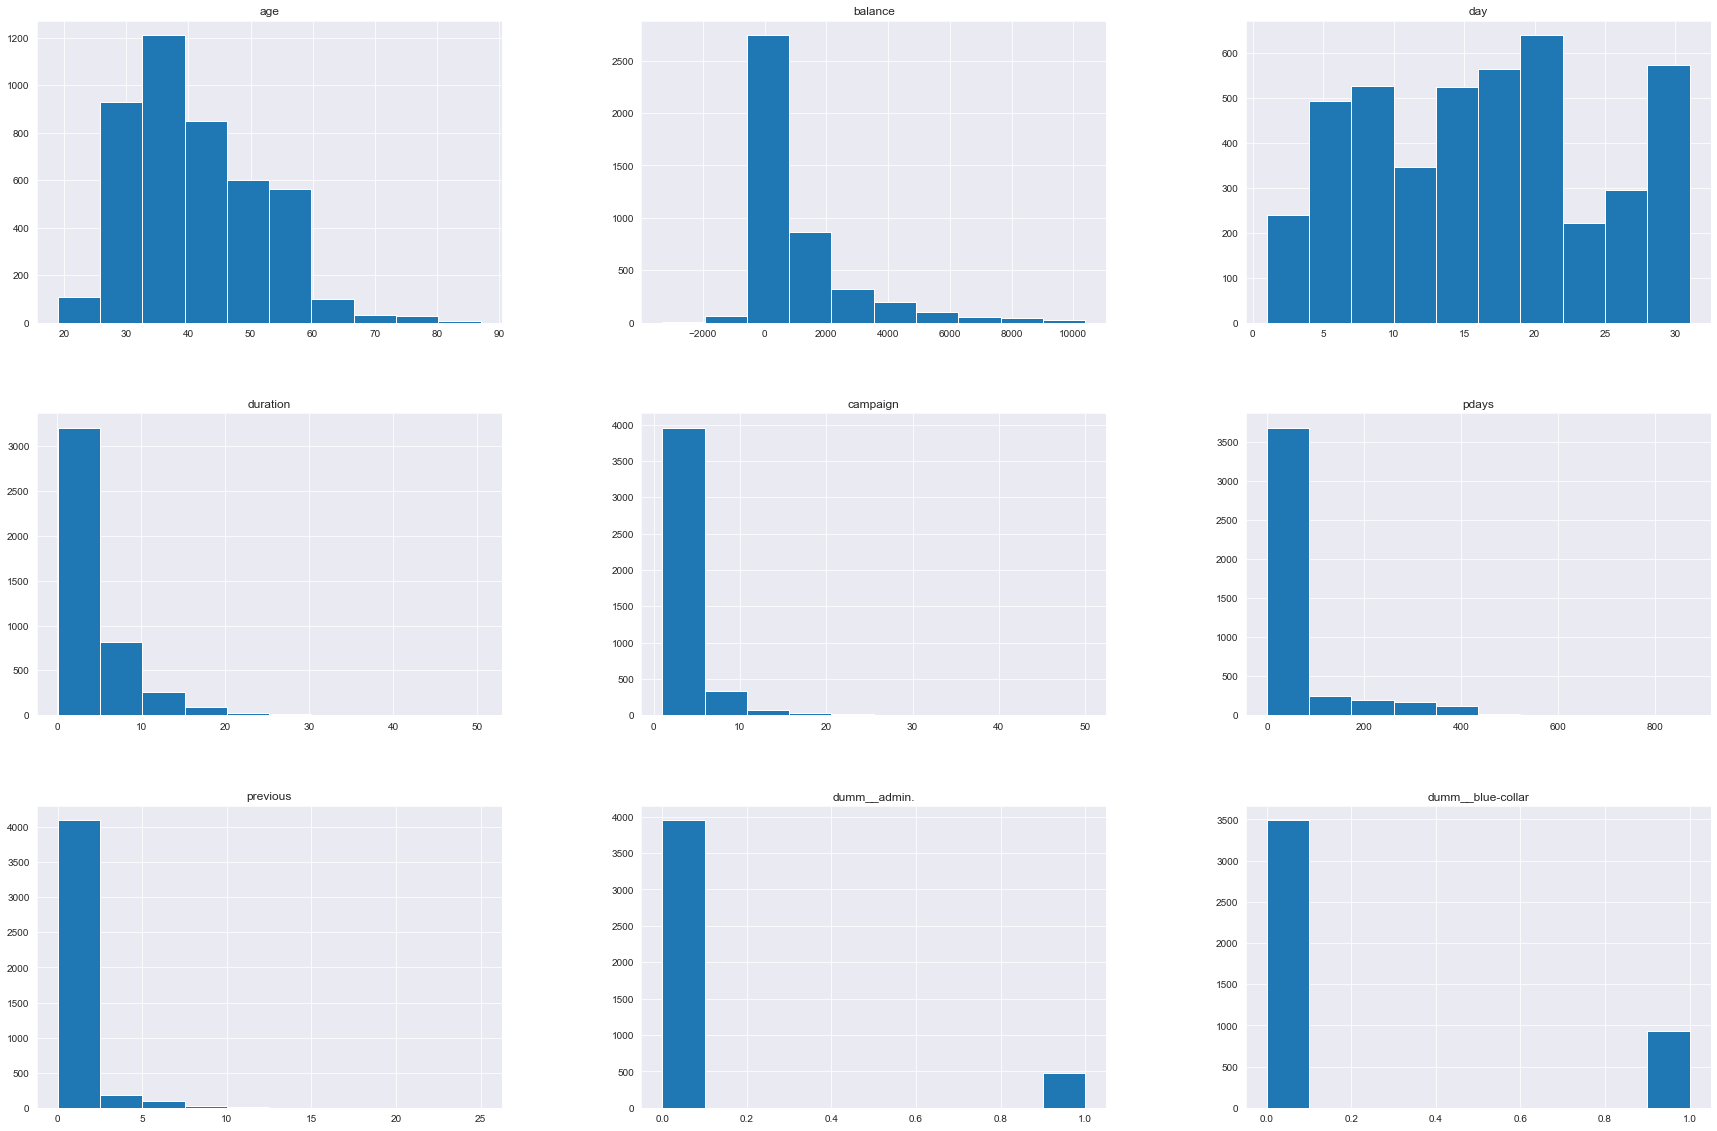

In [138]:
#setting the plot style using seaborn
sns.set_style('darkgrid')

#reviewing the 9 features for ease of review and plotting the histograms
features = df.iloc[:, 0:9]
features.hist(figsize=(30,20))

I know Seaborn is something which is more focused on statistical plots and much flexible and customizable unlike Tableau which owns the market.

As visible,the data is not normally distributed,but finding this won't be an issue to ML algorithms.We will be exploring the data further with a box-and-whisker plot before we start modelling.

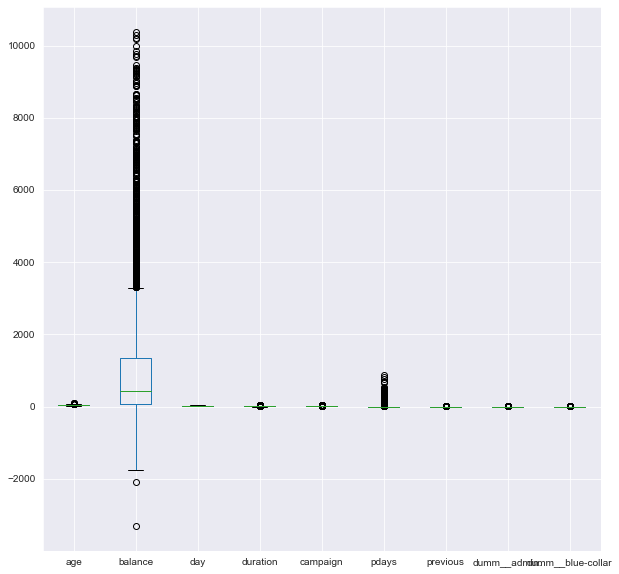

In [139]:
#making the box-and-whisker plot for the data
features.boxplot(figsize=(10,10))

Another useful visualization in this analysis is a heatmap. This will give us an inclination of how many features we may need to retain in our model and what features interact closely together. We can use seaborn to make this plot easily.

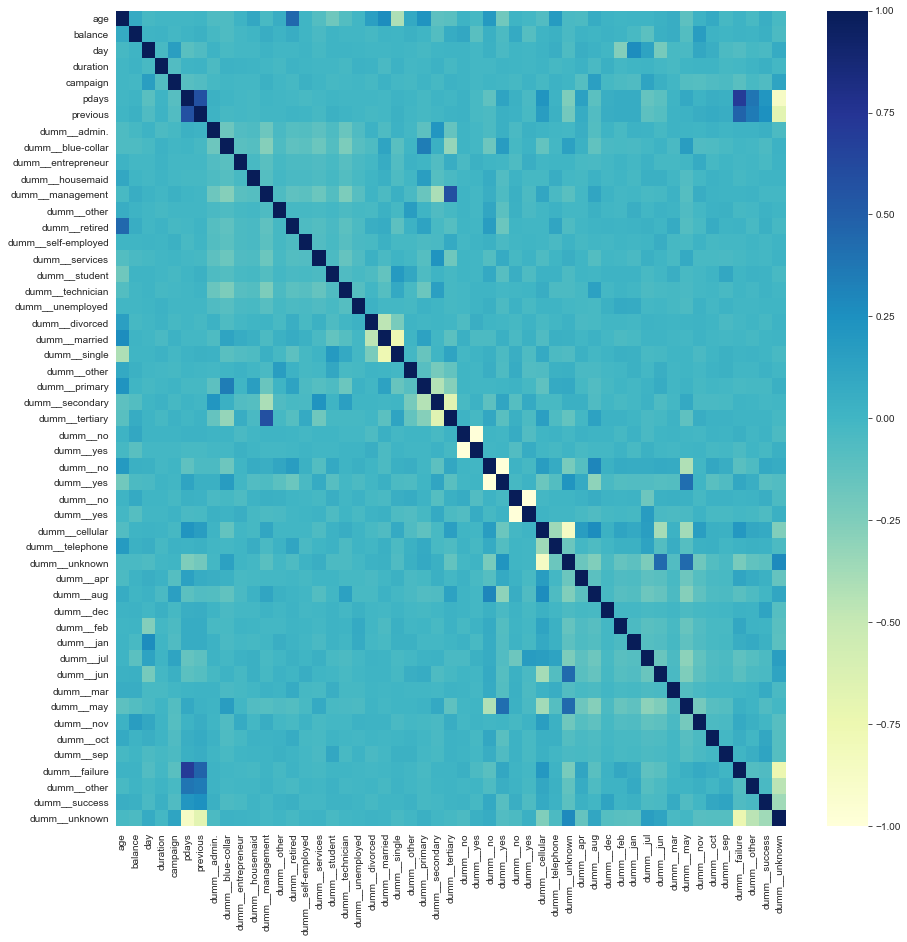

In [140]:

plt.figure(figsize=(15,15))
ax1 = sns.heatmap(df.corr(),cmap="YlGnBu")

We should note here the column "duration" has an interesting relationship with the target variable. If there were no phone calls (i.e. duration =0) then our target, y, has to be no. In order to have a more realistic prediction, we will drop this column from our dataframe.

In [141]:
#dropping duration from df

df=df.drop(["duration"], axis =1)

While the above graph is really informative, we still don't know exactly what we need from our model to be able to cut down on computation time and energy but still produce an acceptable level of accuracy. To narrow it down further, we can run a principal component analysis with different levels of components [2,15,35] to see how much we can trim down.

In [142]:
#creating 3 pca instances
pca_5 = PCA(n_components=5)
pca_15 = PCA(n_components=15)
pca_30 = PCA(n_components=35)

#making a pca dataframe that has the dummies and the target variable
pca_df = df.join( target)

#fitting the model
principalComponents = pca_5.fit_transform(pca_df)
principalComponents = pca_15.fit_transform(pca_df)
principalComponents = pca_30.fit_transform(pca_df)

#print the models' accuracy
print(np.sum(pca_5.explained_variance_ratio_))
print(np.sum(pca_15.explained_variance_ratio_))
print(np.sum(pca_30.explained_variance_ratio_))

0.9999980454918922
0.9999995622357225
0.9999999696804516


0.9999980454918922


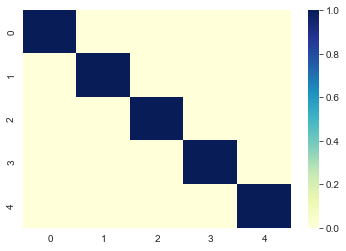

In [143]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(pca_df)
print(np.sum(pca.explained_variance_ratio_))
sns.heatmap(pd.DataFrame(principalComponents).corr(),cmap="YlGnBu")

0.9999379708166567


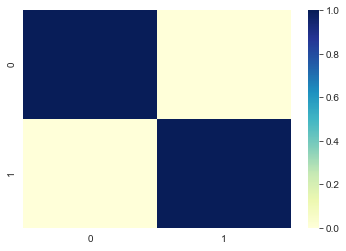

In [144]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pca_df)
print(np.sum(pca.explained_variance_ratio_))
sns.heatmap(pd.DataFrame(principalComponents).corr(),cmap="YlGnBu")

So we initially compared 5 features with 15 and saw not much difference as they do well so I again compared 2 features withh 5 and it does well as well so we know we can trim other features down without losing much information. We'll set our model on the full dataset and include the PCA analysis in the pipeline. Our test size will be 20%.

In [145]:
#Splitting the data into dependent and independent variables 
y = target
X = df

#80% training data with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#ensuring the dependent variables are stored as numeric datatypes
y_train = y_train.astype('int')
y_test = y_test.astype('int')

To facilitate the number of steps and the number of models, we will employ pipelines from ScikitLearn. This will allow us to efficiently run not only the model, but the PCA and we can use a scalar to standardize the dataset to between 0 and 1. We can start with a baseline model and print the accuracy score. We will use logistic regression as the baseline.

In [146]:
#we will set a random state for all of the model for reproducable results
pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                 ('scaler',StandardScaler()),
                 ('clf', LogisticRegression(random_state=42))
])

#fitting the model on training data and printing the accuracy score on test data
pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test, y_test))

0.8836158192090395


As logistic regression is already complete; we shall review the other 5 models are a Support Vector Machine, a Decision Tree, a Random Forest Classifier, the XGBoost model, and the AdaBoost model. After the classifiers are created we can loop through each of the model's scores, and identify the most accurate model, ie the model with a score closest to 1.0.

In [147]:
#creating all of our pipelines and standardizing  the data with standard scaler
pipe_svm = Pipeline([('pca', PCA(n_components=2)),
                     ('scaler', StandardScaler()),
                     ('clf',svm.SVC(probability = True,random_state=42))
                      ])

pipe_tree = Pipeline([('pca', PCA(n_components=2)),
                      ('scaler', StandardScaler()),
                      ('clf',tree.DecisionTreeClassifier(random_state=42))
                       ])


pipe_rf = Pipeline([('pca', PCA(n_components=2)),
                    ('scaler', StandardScaler()),
                    ('clf',RandomForestClassifier(random_state=42))
                     ])

pipe_xgb= Pipeline([('pca', PCA(n_components=2)),
                    ('scaler', StandardScaler()),
                    ('clf',XGBClassifier(random_state=42))
                    ])

pipe_adb = Pipeline([('pca', PCA(n_components=2)),
                     ('scaler', StandardScaler()),
                     ('clf', AdaBoostClassifier(random_state = 42))
                      ])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_tree, pipe_rf, pipe_xgb, pipe_adb]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression' ,1: 'SVM', 2: 'Decision Tree', 3: 'Random Forest', 4:'XGBoost', 5:'AdaBoost'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.8836
SVM pipeline test accuracy: 0.8836
Decision Tree pipeline test accuracy: 0.7842
Random Forest pipeline test accuracy: 0.8678
XGBoost pipeline test accuracy: 0.8780
AdaBoost pipeline test accuracy: 0.8870
Classifier with best accuracy: AdaBoost


As observed, initially it ws SVM showing max accuracy but after running the model for several times ,XGBoost shows maximum accuracy follwed by SVM has max accuracy followed by logistic regresion ,adaboost,randomforest and then decision trees.

The measure of accuracy we are reviewing is calculated by the area under the ROC curve. An area of 1 represents a perfect score and an area of .5 represents a not-so-good model.

Below is a guide for assessing the accuracy of our tests:

.80-1 = excellent

.60-.80 = good

.40-.60 = fair

.20-.40 = poor

<.20 = fail - effectively no better than random chance

Now that we have numerical assessment of the models, all of which did a good job classifying the customers according to the accuracy score, we can review the elbow plots individually to clarify the understanding of model performance.These terms are decided by me as the data we have taken is not so big or else eventually anything below 0.6 is poor.

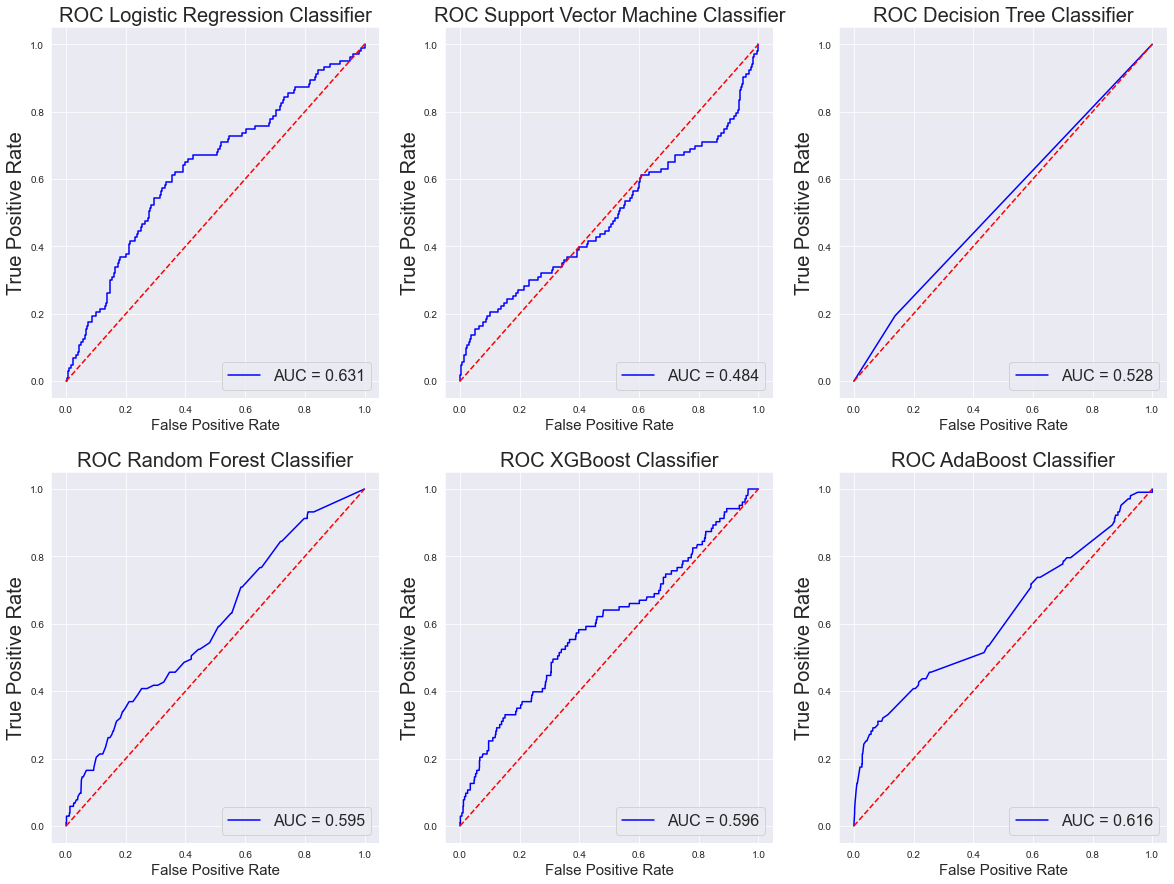

In [148]:
#setting our figures for subplots
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#log model 
probs = pipe_lr.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = roc_curve(y_test, preds)
roc_auclog = auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.3f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Logistic Regression Classifier',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#Decision tree model
probs = pipe_svm.predict_proba(X_test)
preds = probs[:,1]
fprsvm, tprsvm, thresholdsvm = roc_curve(y_test, preds)
roc_aucsvm = auc(fprsvm, tprsvm)

ax_arr[0,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.3f' % roc_aucsvm)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Support Vector Machine Classifier',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Decision tree model
probs = pipe_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = roc_curve(y_test, preds)
roc_aucdtree = auc(fprdtree, tprdtree)

ax_arr[0,2].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.3f' % roc_aucdtree)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC Decision Tree Classifier',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Random Forest Classifier
probs = pipe_rf.predict_proba(X_test)
preds = probs[:,1]
fprrf, tprrf, thresholdrf = roc_curve(y_test, preds)
roc_aucrf =auc(fprrf, tprrf)

ax_arr[1,0].plot(fprrf, tprrf, 'b', label = 'AUC = %0.3f' % roc_aucrf)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Random Forest Classifier',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#XGBoost Classifier
probs = pipe_xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = roc_curve(y_test, preds)
roc_aucxgb =auc(fprxgb, tprxgb)

ax_arr[1,1].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.3f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC XGBoost Classifier',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#AadaBoost Classifier
probs = pipe_adb.predict_proba(X_test)
predsada = probs[:,1]
fpradb, tpradb, thresholdadb = roc_curve(y_test, predsada)
roc_aucadb =auc(fpradb, tpradb)

ax_arr[1,2].plot(fpradb, tpradb, 'b', label = 'AUC = %0.3f' % roc_aucadb)
ax_arr[1,2].plot([0, 1], [0, 1],'r--')
ax_arr[1,2].set_title('ROC AdaBoost Classifier',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

The accuracy scores predicted above were of ranking:
     AdaBoost > logistic regression > XGBoost > RandomForest > SVM > DecisionTree

whereas the ROC visualizations show some different picture. The final piece of this section of the analysis will review all of these plots on the same set of axes. A review of these findings will follow.

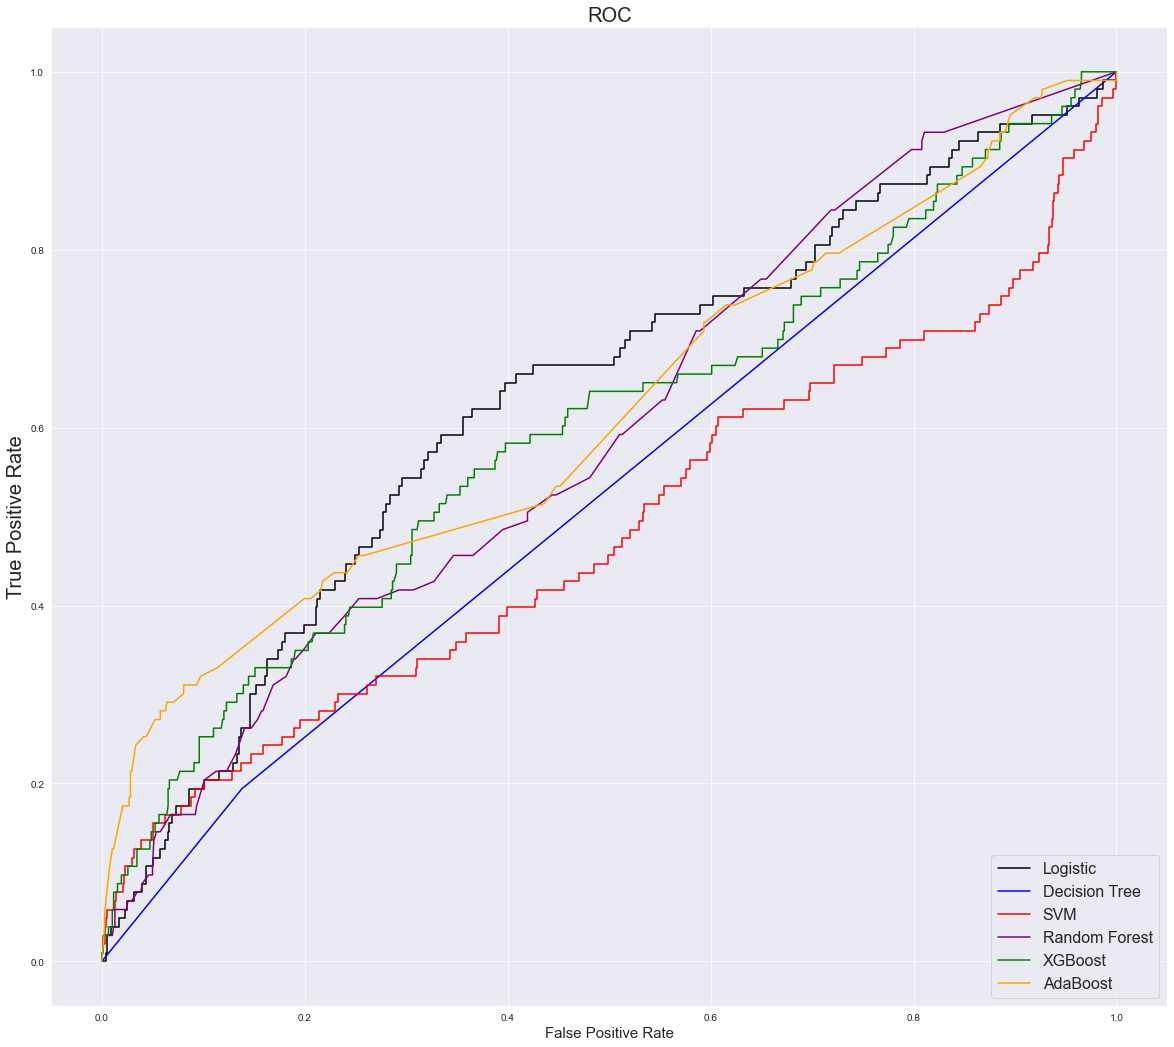

In [149]:
#plotting the ROC on the same axis

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,18))

ax.plot(fprlog, tprlog, 'b', label = 'Logistic', color='black')
ax.plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax.plot(fprsvm, tprsvm, 'b', label = 'SVM', color='red')
ax.plot(fprrf, tprrf, 'b', label = 'Random Forest', color='purple') #visible under the XGBoost line
ax.plot(fprxgb, tprxgb, 'b', label = 'XGBoost', color='green')
ax.plot(fpradb, tpradb, 'b', label = 'AdaBoost', color='orange')

ax.set_title('ROC',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

Looking at the visualization it is clear that DecisionTree & SVM is out of picture being the worst performer and XGBoost and Logistic regression being close enough to consider and then ADaBoost.

We will manually calculate some additional metrics to arrive at a clearer understanding of the make-up of the matrices. Calculating these metrics manually, trade-offs between minimizing False negatives and minimizing False positives becomes much clearer. Scikit.Learn contains methods to compute these values as well.

The three metrics we will compute are as follows:

Precision - True Positive/(True Negative + False Positive) - Measures the ability of the classifier to label a positive sample as a positive sample, not a negative one.

Recall- True Positive / (True Positive + False Negative) - Measures the ability of the classifier to correctly identify all the positive samples. Represents an inverse relationship to Precision, ie increasing your recall score reduces your precision score and vice versa.

F1-Score - 2 (Precision Recall)/(Precision + Recall) - Represents the harmonic mean of precision and recall. Essentially gives the mid-point between increasing balancing recall and precision.

In addition, we will print the confusion matrix for each model so we can review these metrics in action.

In [150]:
for x, pipe in zip(pipe_dict, pipelines):
    #iterating through each model
    print('\n\nConfusion Matrix for {}:'.format(pipe_dict[x]))
    #creating a confusion matrix
    conf_m = confusion_matrix(y_test, pipe.predict(X_test))
    print(conf_m)
    #separating the matrtix into positive and negative and true and false
    true_n = conf_m[0][0]
    false_p = conf_m[0][1]
    false_n = conf_m[1][0]
    true_p = conf_m[1][1]
    #manually calculating the assessment metrics
    precision = true_p/(true_p+false_p)
    recall = true_p/(true_p+false_n)
    f_1= 2*(precision * recall)/(precision + recall)
    #printing our results
    print("Precision :{}%".format(round(precision*100,3)))
    print("Recall: {}%".format(round(recall*100,3)))
    print("F-1: {}%".format(round(f_1*100,3)))



Confusion Matrix for Logistic Regression:
[[782   0]
 [103   0]]
Precision :nan%
Recall: 0.0%
F-1: nan%


Confusion Matrix for SVM:
[[782   0]
 [103   0]]
Precision :nan%
Recall: 0.0%
F-1: nan%


Confusion Matrix for Decision Tree:
[[674 108]
 [ 83  20]]
Precision :15.625%
Recall: 19.417%
F-1: 17.316%


Confusion Matrix for Random Forest:
[[761  21]
 [ 96   7]]
Precision :25.0%
Recall: 6.796%
F-1: 10.687%


Confusion Matrix for XGBoost:
[[768  14]
 [ 94   9]]
Precision :39.13%
Recall: 8.738%
F-1: 14.286%


Confusion Matrix for AdaBoost:
[[780   2]
 [ 98   5]]
Precision :71.429%
Recall: 4.854%
F-1: 9.091%


So what does this mean to us in business terms? First, we need to define what a false positive and false negative are.

A false positive reflects a customer that did not opt for the loan but our model thought it did. False negatives are a customer that did in fact opted for the loan but the model incorrectly classified them as non-subscribers.

 While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

Which business case do we want to minimize? Generally it depends, neither of course are good, but in this case I think we should look for a model that had a lower number of false positives. We're really focusing on the success of the marketing campaign, so if we accidentally bother a customer a second time for a loan, we are an annoyance, but if we attribute false success to the campaign we can end up misallocating company resources.

For example, perhaps an email campaign would have been a better choice if we have a heavily 'no' skewed response. The business manager would want to understand dollars spent and revenue created. We wouldn't want to falsely attribute a success here.

**Overview and Business Insights**

Given what we have outlined in this notebook, what model would we recommend to the bank managers? As I suggested above, minimizing the false positives and therefore should focus on Precision and overall accuracy for the model choice. So, in this case the recommendation would be to use the XGBoost Classifier algorithm. This model performed with high or the highest scores in each of the metric categories we reviewed.

We have created a model for the managers that 71% of the time can correctly identify if a customer has signed up for a term loan product over the phone without taking into account the effect of the duration of the final touch point.

Should the bank undergo an additional marketing campaign with a new customer base, the investment analysis would have a reasonably strong case for their predicted revenues. The model can give a sense of who would actually sign up. Using the XGBoost model has a number of benefits. It was designed as a scalable a gradient boosting algorithm and was developed with the goal of high model performance and computational speeds.

**Future analysis**


We would also address duration for only subscribed customers in a regression analysis to see if we can predict sign-up based on call time. Finally, we could remove our principal component analysis from the pipeline models to see how computational efficiency weighs against accuracy.

**Process Summary**


Using an additional notebook to document process as I move along.

Data description and explanation

Import libraries

Load the data into Pandas Dataframe

Review of attribute descriptions provided with the original dataset

Look at summary statistics

Convert target to binary [0,1]

Save target as separate variable and make a new dataframe for our features with the y series dropped

Get dummy variables for categorical features

Visualizing the selected features using histograms and box-and-whisker plots

Recreating the heatmap with the chosen level of features

Splitting data into train test splits

Setting a baseline Logistic regression model using pipelines

Running separate pipelines for 5 additional models [SVM, Decision tree, Random Forest, XGBoost, AdaBoost]

Creating ROCs to review model performance for each model individually

Plotting each models' ROC on the same axis

Computing additional metrics, precion, recall, and F-1 scores to assess the model appropriateness

Business Insights

Possible future analysis

Summary of methods